In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv('glass.csv')

In [8]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
X=df.drop('Type',axis=1)
Y=df['Type']

In [13]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [14]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
ss=StandardScaler()

In [17]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [18]:
model =tf.keras.Sequential([
       tf.keras.layers.Dense(8,input_shape=(X.shape[1],),activation="softmax")
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy')

In [21]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50,batch_size=10)

Epoch 1/50
15/15 [==============================] - 0s 2ms/step - loss: 2.5640
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 2.4631
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 2.3646
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 2.2716
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 2.1842
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 2.1008
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 2.0223
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9478
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 1.8796
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 1.8172
Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: 1.7579
Epoch 12/50
15/15 [==============================] - 0s 2ms/step - loss: 1.7049
Epoch 13/50
15/15 [==============================

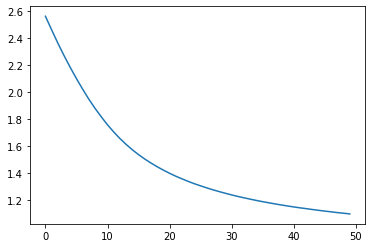

In [22]:
plt.plot(trained_model.history['loss'])

In [23]:
Y_pred=model.predict(X_test_ss)

In [24]:
Y_pred=Y_pred.argmax(axis=1)

In [25]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.62      0.60      0.61        25
           2       0.59      0.76      0.67        21
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       0.90      1.00      0.95         9

    accuracy                           0.66        65
   macro avg       0.60      0.73      0.65        65
weighted avg       0.59      0.66      0.62        65

